In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from itables import show
import os
import glob
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()
files = sorted(glob.glob("classified/combined.csv"))
print(files)
pd.set_option('display.max_colwidth', -1)

['classified/combined.csv']


/home/ubuntu/.virtualenvs/twitter-analysis/lib/python3.7/site-packages/tqdm/_tqdm.py:634: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
%%time
df = pd.concat(pd.read_csv(f, sep=';', lineterminator='\n') for f in files)

CPU times: user 12.4 s, sys: 1.42 s, total: 13.8 s
Wall time: 13.8 s


In [4]:
print(len(df))

976764


In [5]:
%%time
df.timestamp = pd.to_datetime(df.timestamp)
df.index = df.timestamp

CPU times: user 239 ms, sys: 36.6 ms, total: 276 ms
Wall time: 276 ms


In [6]:
daycounts = df.timestamp.resample("D").count()
daycounts[daycounts == 0]

timestamp
2009-12-23    0
2010-01-02    0
2010-01-05    0
2010-01-13    0
2010-01-14    0
             ..
2018-01-27    0
2018-01-28    0
2018-01-29    0
2018-05-12    0
2018-10-19    0
Name: timestamp, Length: 2688, dtype: int64

In [7]:
df.columns

Index(['username', 'fullname', 'user_id', 'tweet_id', 'tweet_url', 'timestamp',
       'timestamp_epochs', 'replies', 'retweets', 'likes', 'is_retweet',
       'retweeter_username', 'retweeter_userid', 'retweet_id', 'text', 'html',
       'text_with_emoji', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

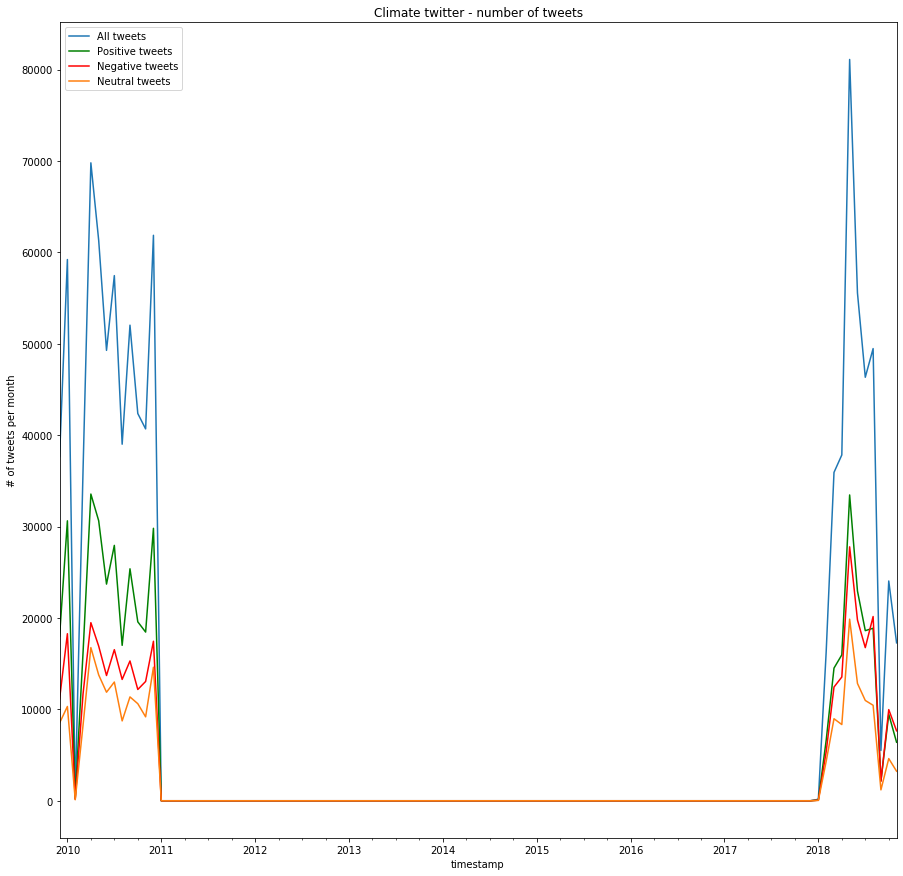

In [20]:
df.timestamp.resample("M").count().plot(figsize=(15,15), title="Climate twitter - number of tweets")
df.timestamp[df["compound"] > 0.05].resample("M").count().plot(color='g')
df.timestamp[df["compound"] < -0.05].resample("M").count().plot(color='r')
df.timestamp[df["compound"].between(-.05, .05)].resample("M").count().plot()
plt.legend(["All tweets", "Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()

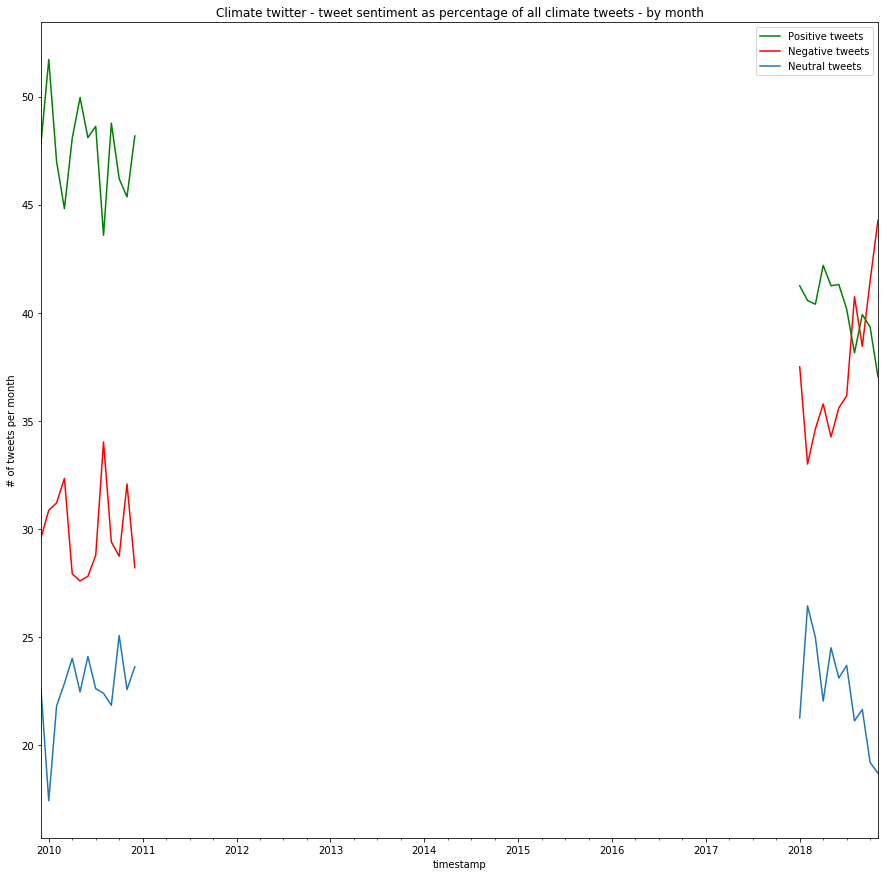

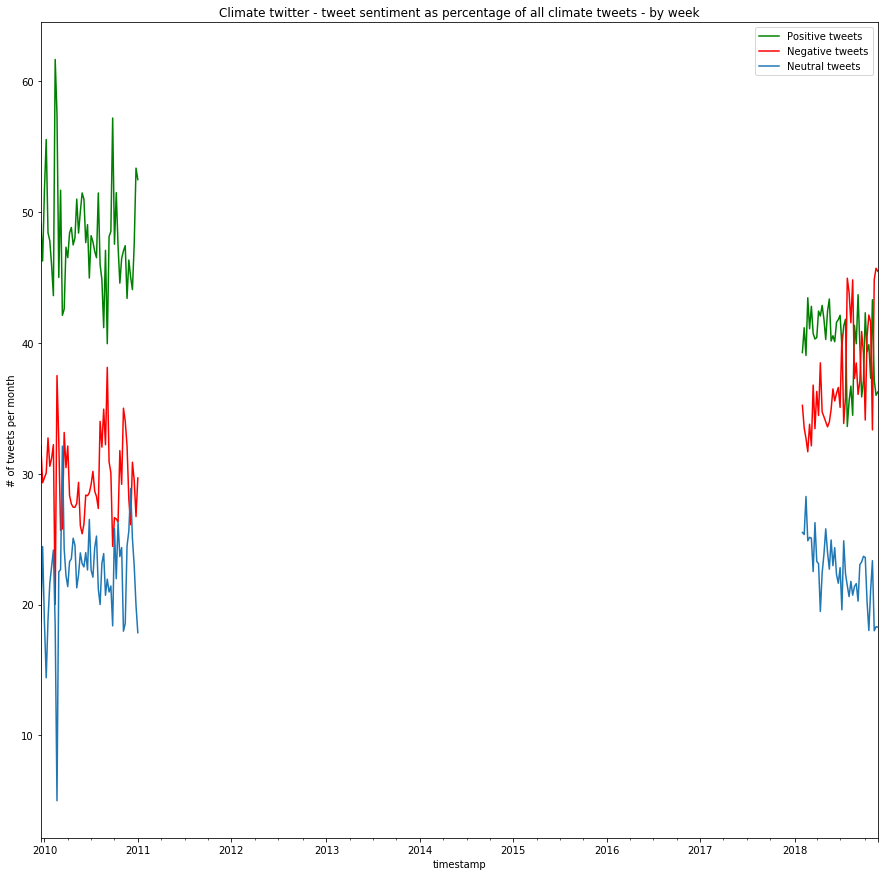

In [26]:
#et_by_month_pc = et_by_month.count() / by_month.count() * 100

all_tweets_monthly = df.timestamp.resample("M").count()
pos_tweets = df.timestamp[df["compound"] > 0.05].resample("M").count()
pos_tweets_pc = pos_tweets / all_tweets_monthly * 100
neg_tweets = df.timestamp[df["compound"] < -0.05].resample("M").count()
neg_tweets_pc = neg_tweets / all_tweets_monthly * 100
neutral_tweets = df.timestamp[df["compound"].between(-.05, .05)].resample("M").count()
neutral_tweets_pc = neutral_tweets / all_tweets_monthly * 100

pos_tweets_pc.plot(figsize=(15,15), title="Climate twitter - tweet sentiment as percentage of all climate tweets - by month",color="g")
neg_tweets_pc.plot(color='r')
neutral_tweets_pc.plot()
plt.legend(["Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()


#et_by_month_pc = et_by_month.count() / by_month.count() * 100
all_tweets_monthly = df.timestamp.resample("W").count()
pos_tweets = df.timestamp[df["compound"] > 0.05].resample("W").count()
pos_tweets_pc = pos_tweets / all_tweets_monthly * 100
neg_tweets = df.timestamp[df["compound"] < -0.05].resample("W").count()
neg_tweets_pc = neg_tweets / all_tweets_monthly * 100
neutral_tweets = df.timestamp[df["compound"].between(-.05, .05)].resample("W").count()
neutral_tweets_pc = neutral_tweets / all_tweets_monthly * 100

pos_tweets_pc.plot(figsize=(15,15), title="Climate twitter - tweet sentiment as percentage of all climate tweets - by week",color="g")
neg_tweets_pc.plot(color='r')
neutral_tweets_pc.plot()
plt.legend(["Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()

In [ ]:
df.timestamp.resample("M").count().plot(figsize=(15,15), title="Climate twitter - sentiment percentages")
df.timestamp[df["compound"] > 0.05].resample("M").count().plot(color='g')
df.timestamp[df["compound"] < -0.05].resample("M").count().plot(color='r')
df.timestamp[df["compound"].between(-.05, .05)].resample("M").count().plot()
plt.legend(["All tweets", "Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()

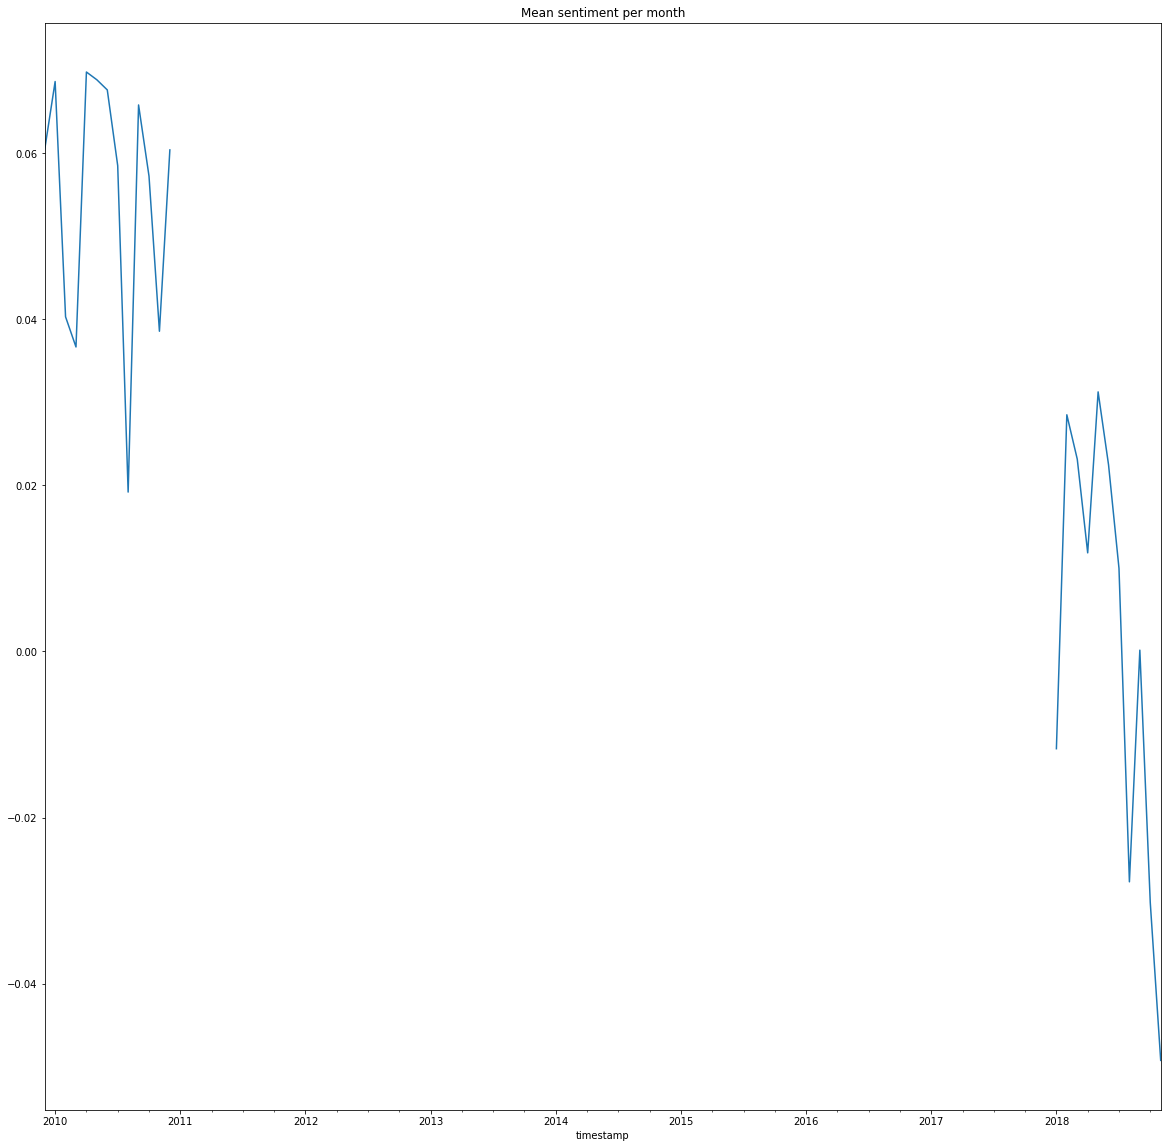

In [16]:
df["compound"].resample("M").mean().plot(figsize=(20,20), title="Mean sentiment per month")

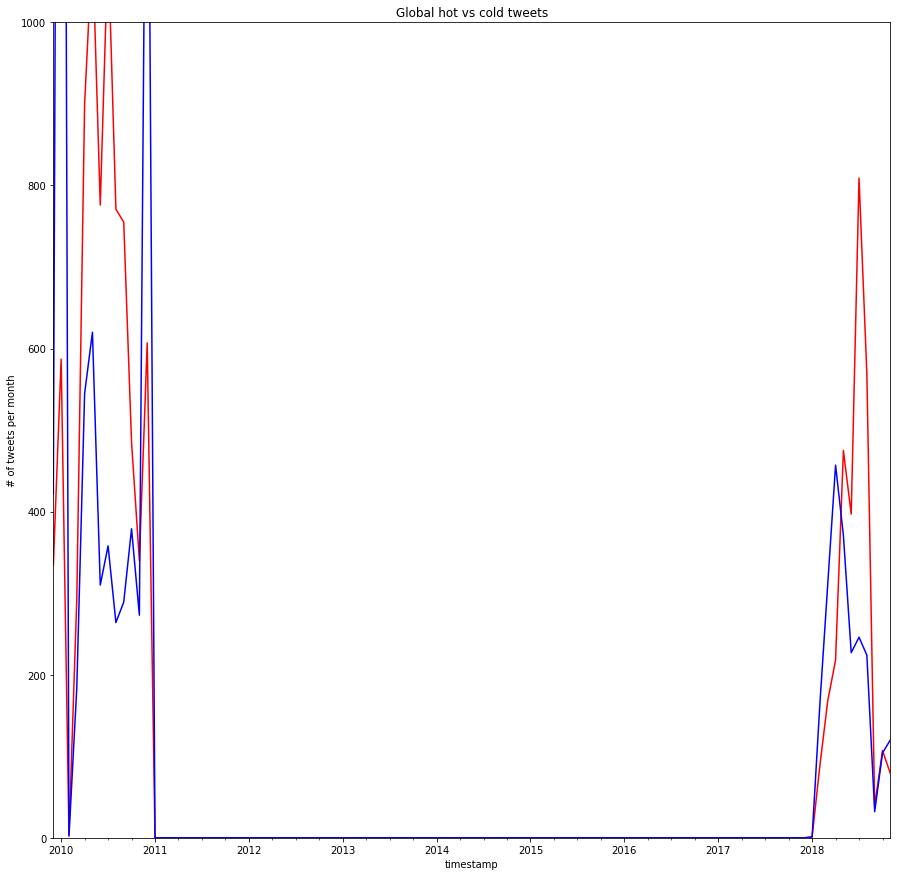

In [17]:
df.timestamp[df.text.str.contains(r"\bhot\b", na=False)].resample("M").count().plot(figsize=(15, 15), title="Global hot vs cold tweets", color="r", ylim=(0,1000))
df.timestamp[df.text.str.contains(r"\bcold\b", na=False)].resample("M").count().plot(color="b")
plt.ylabel("# of tweets per month")
plt.show()